In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Import dataset


In [2]:
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore data

#### Data Description

- *PassengerId* - unique id number to each passenger
- *Survived* - passenger survive(1) or died(0)
- *Pclass* - passenger class
- *Name* - name
- *Sex* - gender of passenger
- *Age* - age of passenger
- *SibSp* - number of siblings/spouses
- *Parch* - number of parents/children
- *Ticket* - ticket number
- *Fare* - amount of money spent on ticket
- *Cabin* - cabin category
- *Embarked* - port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

#### General overview

This dataset has:

- 5 numerical discrete variables: *PassengerId, Survived, Pclass, SibSp, Parch* - *that includes our id and our target*
- 2 numerical continuous variables: *Age, Fare*
- 5 categorical variables: *Name, Sex, Ticket, Cabin, Embarked*

In [5]:
dtypes = pd.DataFrame(df.dtypes.reset_index())
dtypes.columns = ['index', 'type']

numerical_float = list(dtypes[(dtypes.type == 'float64')]['index'].values)
numerical_integer = list(dtypes[(dtypes.type == 'int64')]['index'].values)
categorical = list(dtypes[(dtypes.type == 'object')]['index'].values)

print('Numerical Continuous:\n', numerical_float)
print('Numerical Discrete:\n', numerical_integer)
print('Categorical:\n', categorical)

Numerical Continuous:
 ['Age', 'Fare']
Numerical Discrete:
 ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
Categorical:
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


The numerical variables (discrete and continous) data seems to haven't erroneous values, like negative *Age, Parch* or *Fare*

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The *Cabin* feature has a bunch of missing values, maybe it's necessary to treat the missings to get better models.

In [7]:
missing_data = df.isnull().sum() / len(df)
missing_data = missing_data.sort_values()
missing_data

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

### Analysing Survivors and Non-Survivals

#### Overall Survivors and Non-Survivals

- 61.6% of the passengers survived, and 38.4% don't.

In [8]:
print('Non-Survival Rate:', round(1-np.mean(df['Survived']), 2))
print('Survival Rate:', round(np.mean(df['Survived']), 2))

Non-Survival Rate: 0.62
Survival Rate: 0.38


#### Survivors and Non-Survivals by Variables

- We will represent the distribution of variables through count graphs. And we will also make the relative counts, according to the cases of Survivors.

- Grouping survivors by Pclass we see that on average 63% of the passengers of the 1st class survived, 47.23% of the 2nd and only 24.24% in the 3rd.

In [9]:
# Create function to plot barplots

def bar_plot_cat(variable):
    """
        input: variable name
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [10]:
# Create function to plot histograms

def plot_hist_numerical(variable):
    """
        input: variable name
        output: histogram
    """
    plt.figure(figsize = (12, 8))
    plt.hist(df[variable], bins = 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [11]:
# Create function to plot relative counts of survivors

# def plot_survival(variable):
#     g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2)
#     g.map(plt.hist, "Age", bins = 25)
#     g.add_legend()
#     plt.show()

In [12]:
# Create lists with variables to plot

numerical_float_plot =  ['Age', 'Fare']
numerical_integer_plot =  ['Pclass', 'SibSp', 'Parch']
categorical_plot =  ['Sex', 'Embarked']

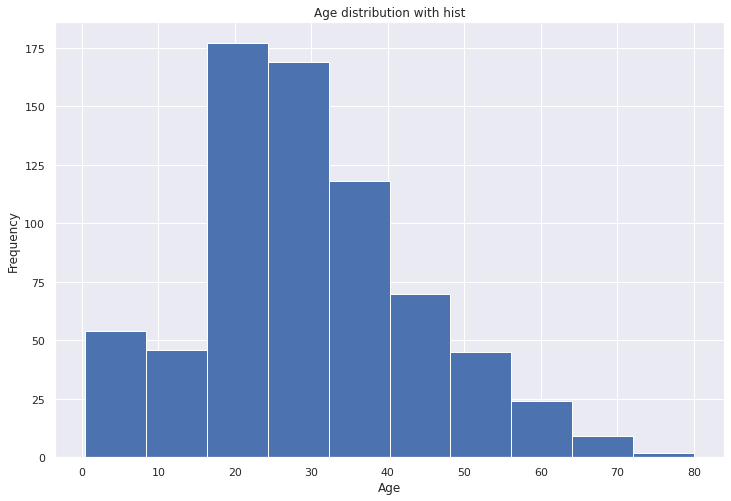

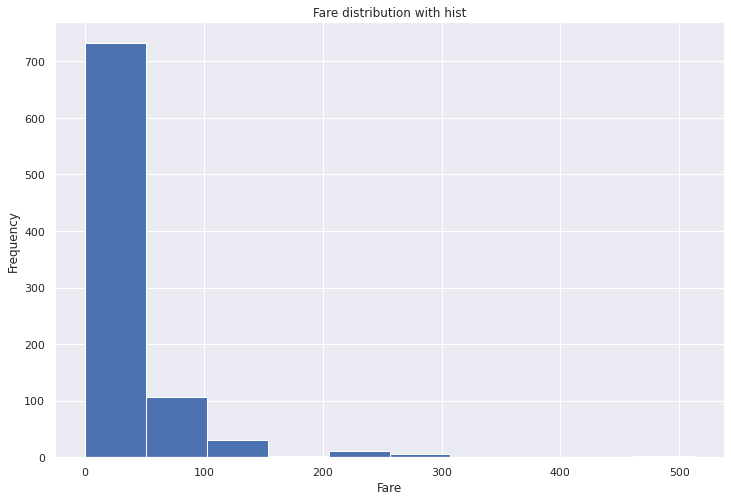

In [13]:
for num in numerical_float_plot:
    plot_hist_numerical(num)

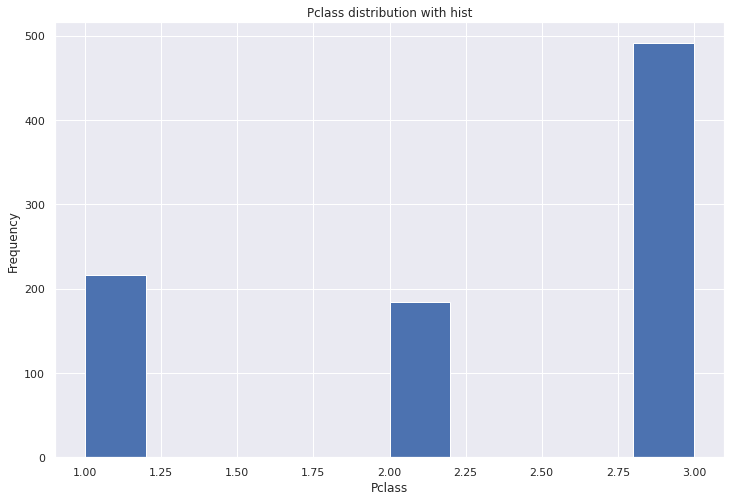

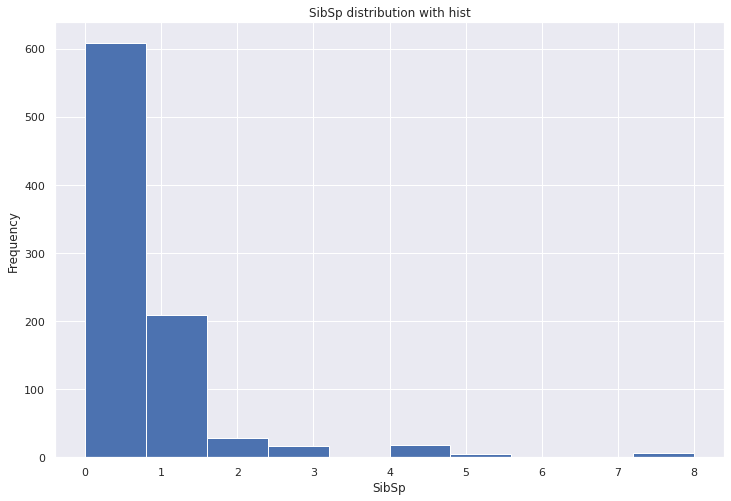

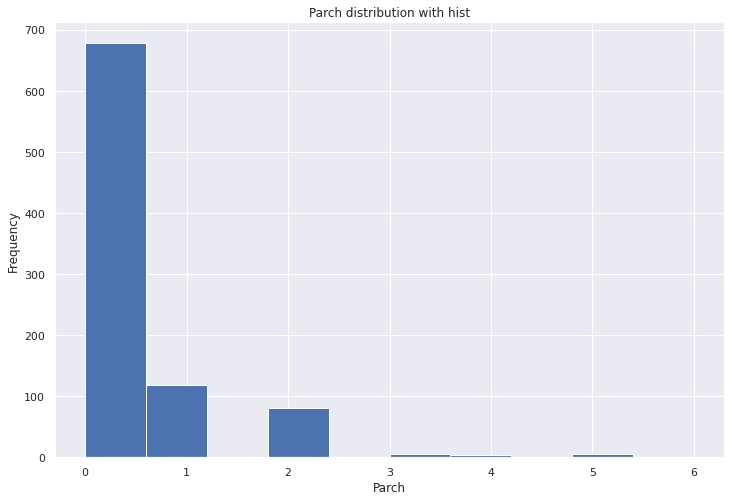

In [14]:
for num in numerical_integer_plot:
    plot_hist_numerical(num)

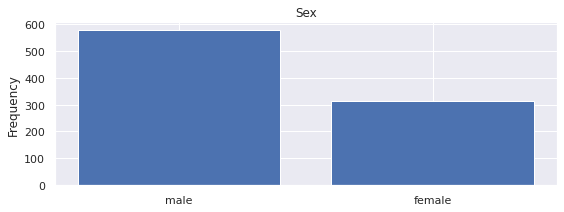

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


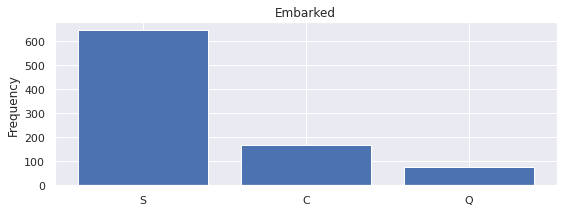

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [15]:
for cat in categorical_plot:
    bar_plot_cat(cat)